## Import libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.stats import sigma_clipped_stats,median_absolute_deviation
from photutils.segmentation import detect_sources

## Let's define the path to the data directory and summarize files presents in the directory

In [2]:
path='Savary_training_set_lenses/'
category='Lens_simulations/'
list_files=os.listdir(path+category)

## Create a subsample without contaminant. I just use a brutal detection without substracting background etc...

In [3]:
one_source=[]

for image in list_files:
    image_file=path+category+image
    get_data, get_header = fits.getdata(image_file, header=True)
    std = median_absolute_deviation(get_data)
    threshold=3.*std
    segm = detect_sources(get_data, threshold, npixels=5)
    if segm.nlabels<2:
        one_source.append(image)

len(one_source)

7080

## making a subsample of 1000 images without contaminant

In [4]:
subsample_1000=np.random.choice(one_source, size=1000, replace=False)
np.save('subsample_1000',subsample_1000)

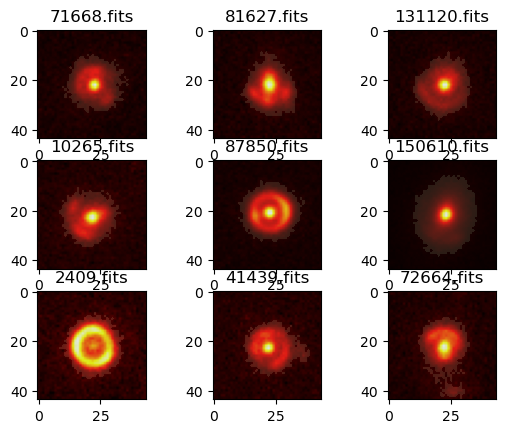

In [5]:
for count, image in zip(range(1,10),np.random.choice(subsample_1000, size=9, replace=False)):#No replacement to avoid the displaying of a same picture
    image_file=path+category+image
    get_data, get_header = fits.getdata(image_file, header=True)
    std = median_absolute_deviation(get_data)
    threshold=3.*std
    segm = detect_sources(get_data, threshold, npixels=5)
    plt.figure(1)
    plt.subplot(330+count)
    plt.title(image)
    plt.imshow(get_data, cmap='hot')
    plt.imshow(segm.data, cmap=segm.make_cmap(seed=1234),alpha=0.2)
plt.show()